In [3]:
import numpy as np
import matplotlib as plt
import pandas as pd
import seaborn as sns
import scipy

In [4]:
# read csv
filePath = '../Data/SkyrimWeapons.csv'
SkyrimWeaponsData = pd.read_csv(filePath)
print(SkyrimWeaponsData.shape)

(293, 9)


We have 239 rows and 9 cols

In [5]:
print(SkyrimWeaponsData.Type.unique())
print(SkyrimWeaponsData.Type.unique().shape)

['Battleaxe' 'Dagger' 'Mace' 'Sword' 'War Axe' 'Silverware' 'Greatsword'
 'Warhammer' 'Bow' 'Arrow' 'Crossbow' 'Bolt']
(12,)


We have 12 types of weapons in the original data, we can discard silverware, arrows and bolts for now

In [6]:
SkyrimWeaponsData = SkyrimWeaponsData.loc[(SkyrimWeaponsData['Type'] != 'Arrow') & (SkyrimWeaponsData['Type'] != 'Bolt') & (SkyrimWeaponsData['Type'] != 'Silverware')]
SkyrimWeaponsData

,Name,Damage,Weight,Gold,Upgrade,Perk,Type,Category,Speed
0,Ancient Nord Battle Axe,18,22.0,28,Steel Ingot,Steel,Battleaxe,Two-Handed,NaN
1,Daedric Battleaxe,25,27.0,2750,Ebony Ingot,Daedric,Battleaxe,Two-Handed,NaN
2,Dragonbone Battleaxe,26,30.0,3000,Dragon Bone,Dragon,Battleaxe,Two-Handed,NaN
3,Drainblood Battleaxe,21,5.0,266,NaN,-,Battleaxe,Two-Handed,NaN
4,Dwarven Battleaxe,20,23.0,300,Dwarven Metal Ingot,Dwarven,Battleaxe,Two-Handed,NaN
...,...,...,...,...,...,...,...,...,...
260,Zephyr DG,12,10.0,670,Dwarven Metal Ingot,Dwarven,Bow,Archery,1.0
281,Crossbow,19,14.0,120,Steel Ingot,NaN,Crossbow,Archery,NaN
282,Dwarven Crossbow,22,20.0,350,Dwarven metal ingot,NaN,Crossbow,Archery,NaN
283,Enhanced Crossbow,19,15.0,200,Steel Ingot,NaN,Crossbow,Archery,NaN


We now have 263 rows and 9 columns

In [7]:
print(SkyrimWeaponsData.Damage.describe())

count    263.000000
mean      13.095057
std        5.633401
min        1.000000
25%        9.000000
50%       12.000000
75%       17.000000
max       28.000000
Name: Damage, dtype: float64


In [8]:
weakestWeapon = SkyrimWeaponsData.sort_values(by='Damage')
weakestWeapon = weakestWeapon.iloc[:10]
weakestWeapon

,Name,Damage,Weight,Gold,Upgrade,Perk,Type,Category,Speed
161,Illusory War Axe,1,14.0,15,NaN,–,War Axe,One-Handed,NaN
126,Phantom Sword,1,0.0,0,NaN,-,Sword,One-Handed,NaN
143,Wooden Sword,2,3.0,25,Firewood,NaN,Sword,One-Handed,NaN
34,Iron Dagger,4,2.0,10,Iron Ingot,NaN,Dagger,One-Handed,NaN
45,Steel Dagger,5,2.5,18,Steel Ingot,Steel,Dagger,One-Handed,NaN
175,Poacher's Axe,5,10.0,32,Steel Ingot,NaN,War Axe,One-Handed,NaN
42,Shiv,5,2.0,5,NaN,-,Dagger,One-Handed,NaN
41,Rundi's Dagger,5,2.5,18,Steel Ingot,Steel,Dagger,One-Handed,NaN
171,Notched Pickaxe,5,10.0,303,Iron Ingot,NaN,War Axe,One-Handed,NaN
180,Woodcutter's Axe,5,10.0,5,NaN,–,War Axe,One-Handed,NaN


In [9]:
strongestWeapon = SkyrimWeaponsData.sort_values(by='Damage', ascending=False)
strongestWeapon = strongestWeapon.iloc[:10]
strongestWeapon

,Name,Damage,Weight,Gold,Upgrade,Perk,Type,Category,Speed
208,Dragonbone Warhammer,28,33.0,4275,Dragon Bone,Dragon,Warhammer,Two-Handed,NaN
205,Daedric Warhammer,27,31.0,4000,Ebony Ingot,Daedric,Warhammer,Two-Handed,NaN
20,Tsun's Battleaxe,27,36.0,1000,NaN,-,Battleaxe,Two-Handed,NaN
217,Stalhrim Warhammer,26,29.0,2850,Stalhrim,Ebony,Warhammer,Two-Handed,NaN
2,Dragonbone Battleaxe,26,30.0,3000,Dragon Bone,Dragon,Battleaxe,Two-Handed,NaN
21,Wuuthrad,25,25.0,2000,NaN,-,Battleaxe,Two-Handed,NaN
248,Karliah's Bow,25,9.0,5,NaN,-,Bow,Archery,0.625
210,Ebony Warhammer,25,30.0,1725,Ebony Ingot,Ebony,Warhammer,Two-Handed,NaN
221,Volendrung,25,26.0,1843,Ebony Ingot,NaN,Warhammer,Two-Handed,NaN
1,Daedric Battleaxe,25,27.0,2750,Ebony Ingot,Daedric,Battleaxe,Two-Handed,NaN


From the previous data we can see that most of the weak weapons are one handed and most of the stronger weapons are 2 handed

We also notice that swords and daggers are common in the weak weapons caregory and warhammers and battleaxes are more common in the strong weapons category

<Axes: xlabel='Category', ylabel='Damage'>

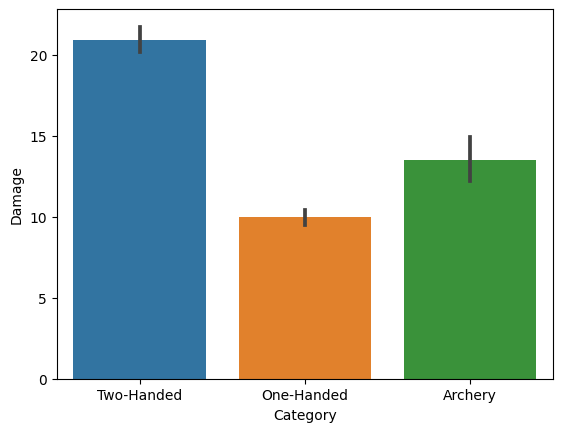

In [10]:
plt.pyplot.Figure(figsize=(10,40))
sns.barplot(x=SkyrimWeaponsData['Category'], y=SkyrimWeaponsData['Damage'])

We can see that 2 handed weapons are superior in terms of damage and one handed weapons are not that great

<Axes: xlabel='Type', ylabel='Damage'>

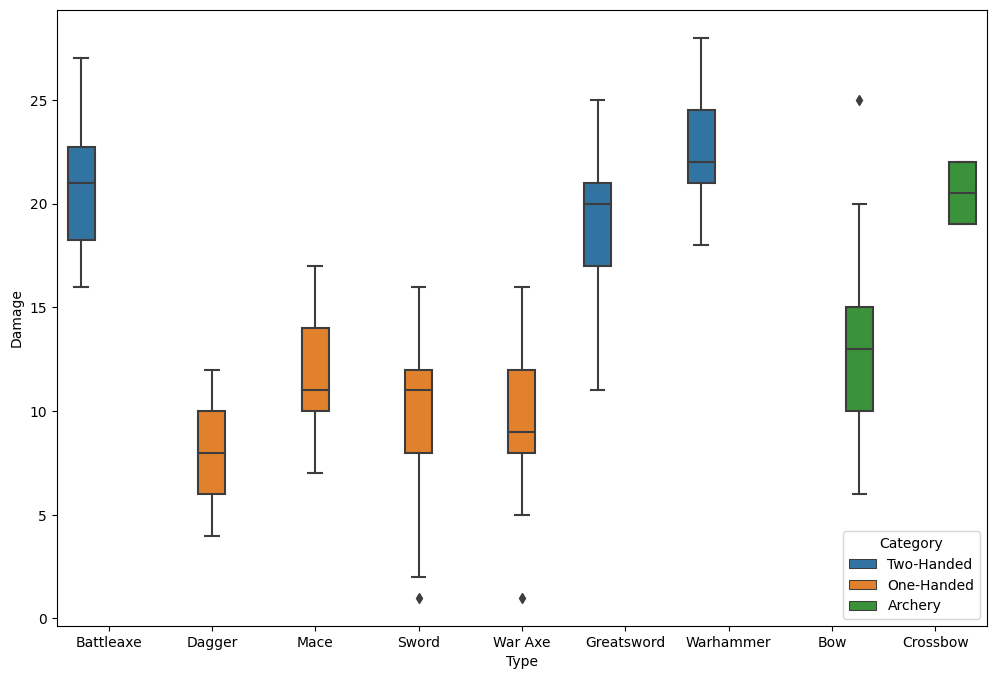

In [11]:
plt.rcParams['figure.figsize'] = 12,8
sns.boxplot(x=SkyrimWeaponsData['Type'], y=SkyrimWeaponsData['Damage'], hue=SkyrimWeaponsData['Category'])

Boxplots allow us to see that 2 handed weapons have a high mean damage. Bows have much lower mean damage but theres an outlier which rivals the damage of some warhammers. One handed weapons have low mean damages with swords and war axes having outliers which bring their means down by a lot

Heaviest Weapons


In [12]:
SkyrimWeaponsData.sort_values('Weight', ascending=False)

,Name,Damage,Weight,Gold,Upgrade,Perk,Type,Category,Speed
20,Tsun's Battleaxe,27,36.0,1000,NaN,-,Battleaxe,Two-Handed,NaN
208,Dragonbone Warhammer,28,33.0,4275,Dragon Bone,Dragon,Warhammer,Two-Handed,NaN
205,Daedric Warhammer,27,31.0,4000,Ebony Ingot,Daedric,Warhammer,Two-Handed,NaN
2,Dragonbone Battleaxe,26,30.0,3000,Dragon Bone,Dragon,Battleaxe,Two-Handed,NaN
210,Ebony Warhammer,25,30.0,1725,Ebony Ingot,Ebony,Warhammer,Two-Handed,NaN
...,...,...,...,...,...,...,...,...,...
34,Iron Dagger,4,2.0,10,Iron Ingot,NaN,Dagger,One-Handed,NaN
42,Shiv,5,2.0,5,NaN,-,Dagger,One-Handed,NaN
22,Alessandra's Dagger,5,1.0,10,NaN,-,Dagger,One-Handed,NaN
101,Ghostblade,8,1.0,300,3 Ectoplasm,NaN,Sword,One-Handed,NaN


We can the heaview weapons have a mean damage above 30 and are mostly 2 handed

<Axes: xlabel='Weight', ylabel='Damage'>

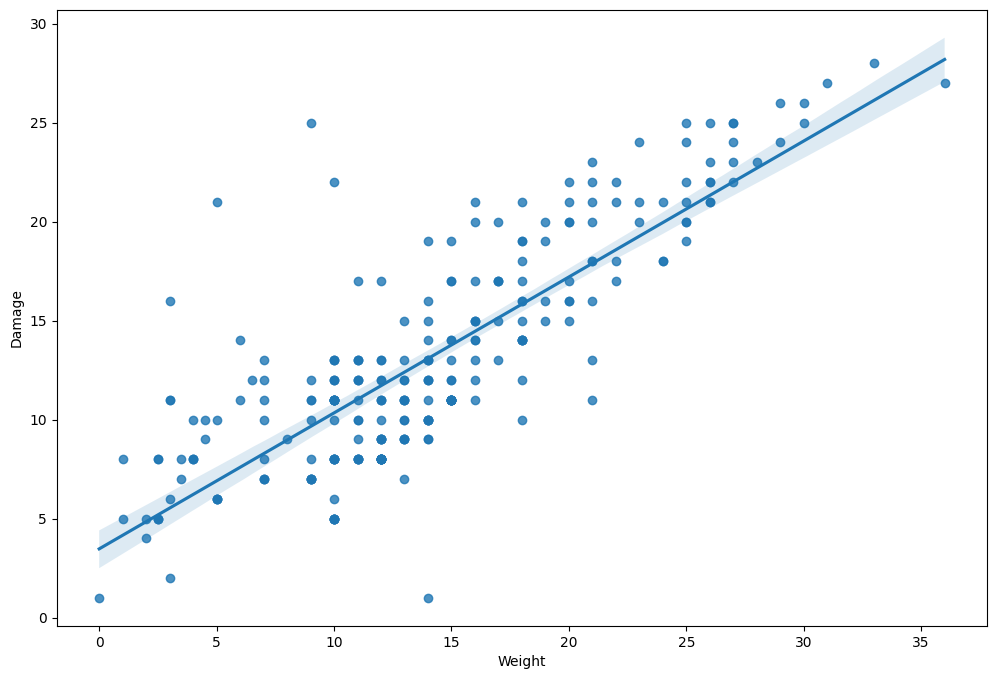

In [13]:
sns.regplot(x=SkyrimWeaponsData['Weight'], y=SkyrimWeaponsData['Damage'])

<Axes: xlabel='Damage', ylabel='Weight'>

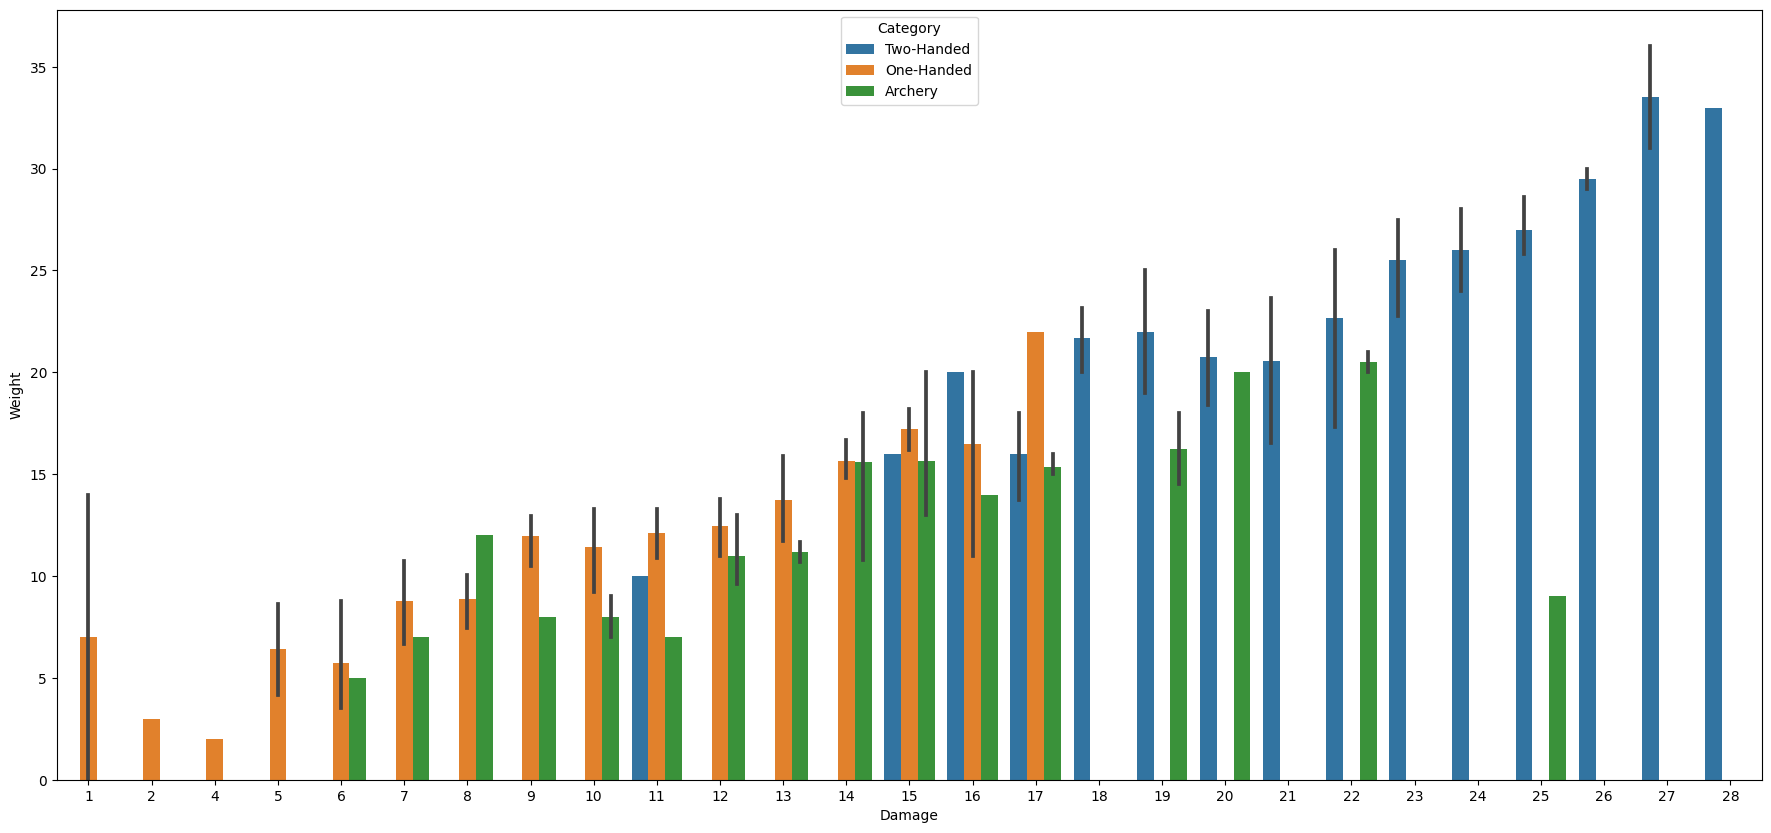

In [14]:
plt.rcParams['figure.figsize'] = 22,10
sns.barplot(y=SkyrimWeaponsData['Weight'], x=SkyrimWeaponsData['Damage'], hue=SkyrimWeaponsData['Category'])

We can see a clear relation between weight, type and damage. two handed weapons have more weight and more damage than bows and one handed weapons

<Axes: xlabel='Upgrade', ylabel='count'>

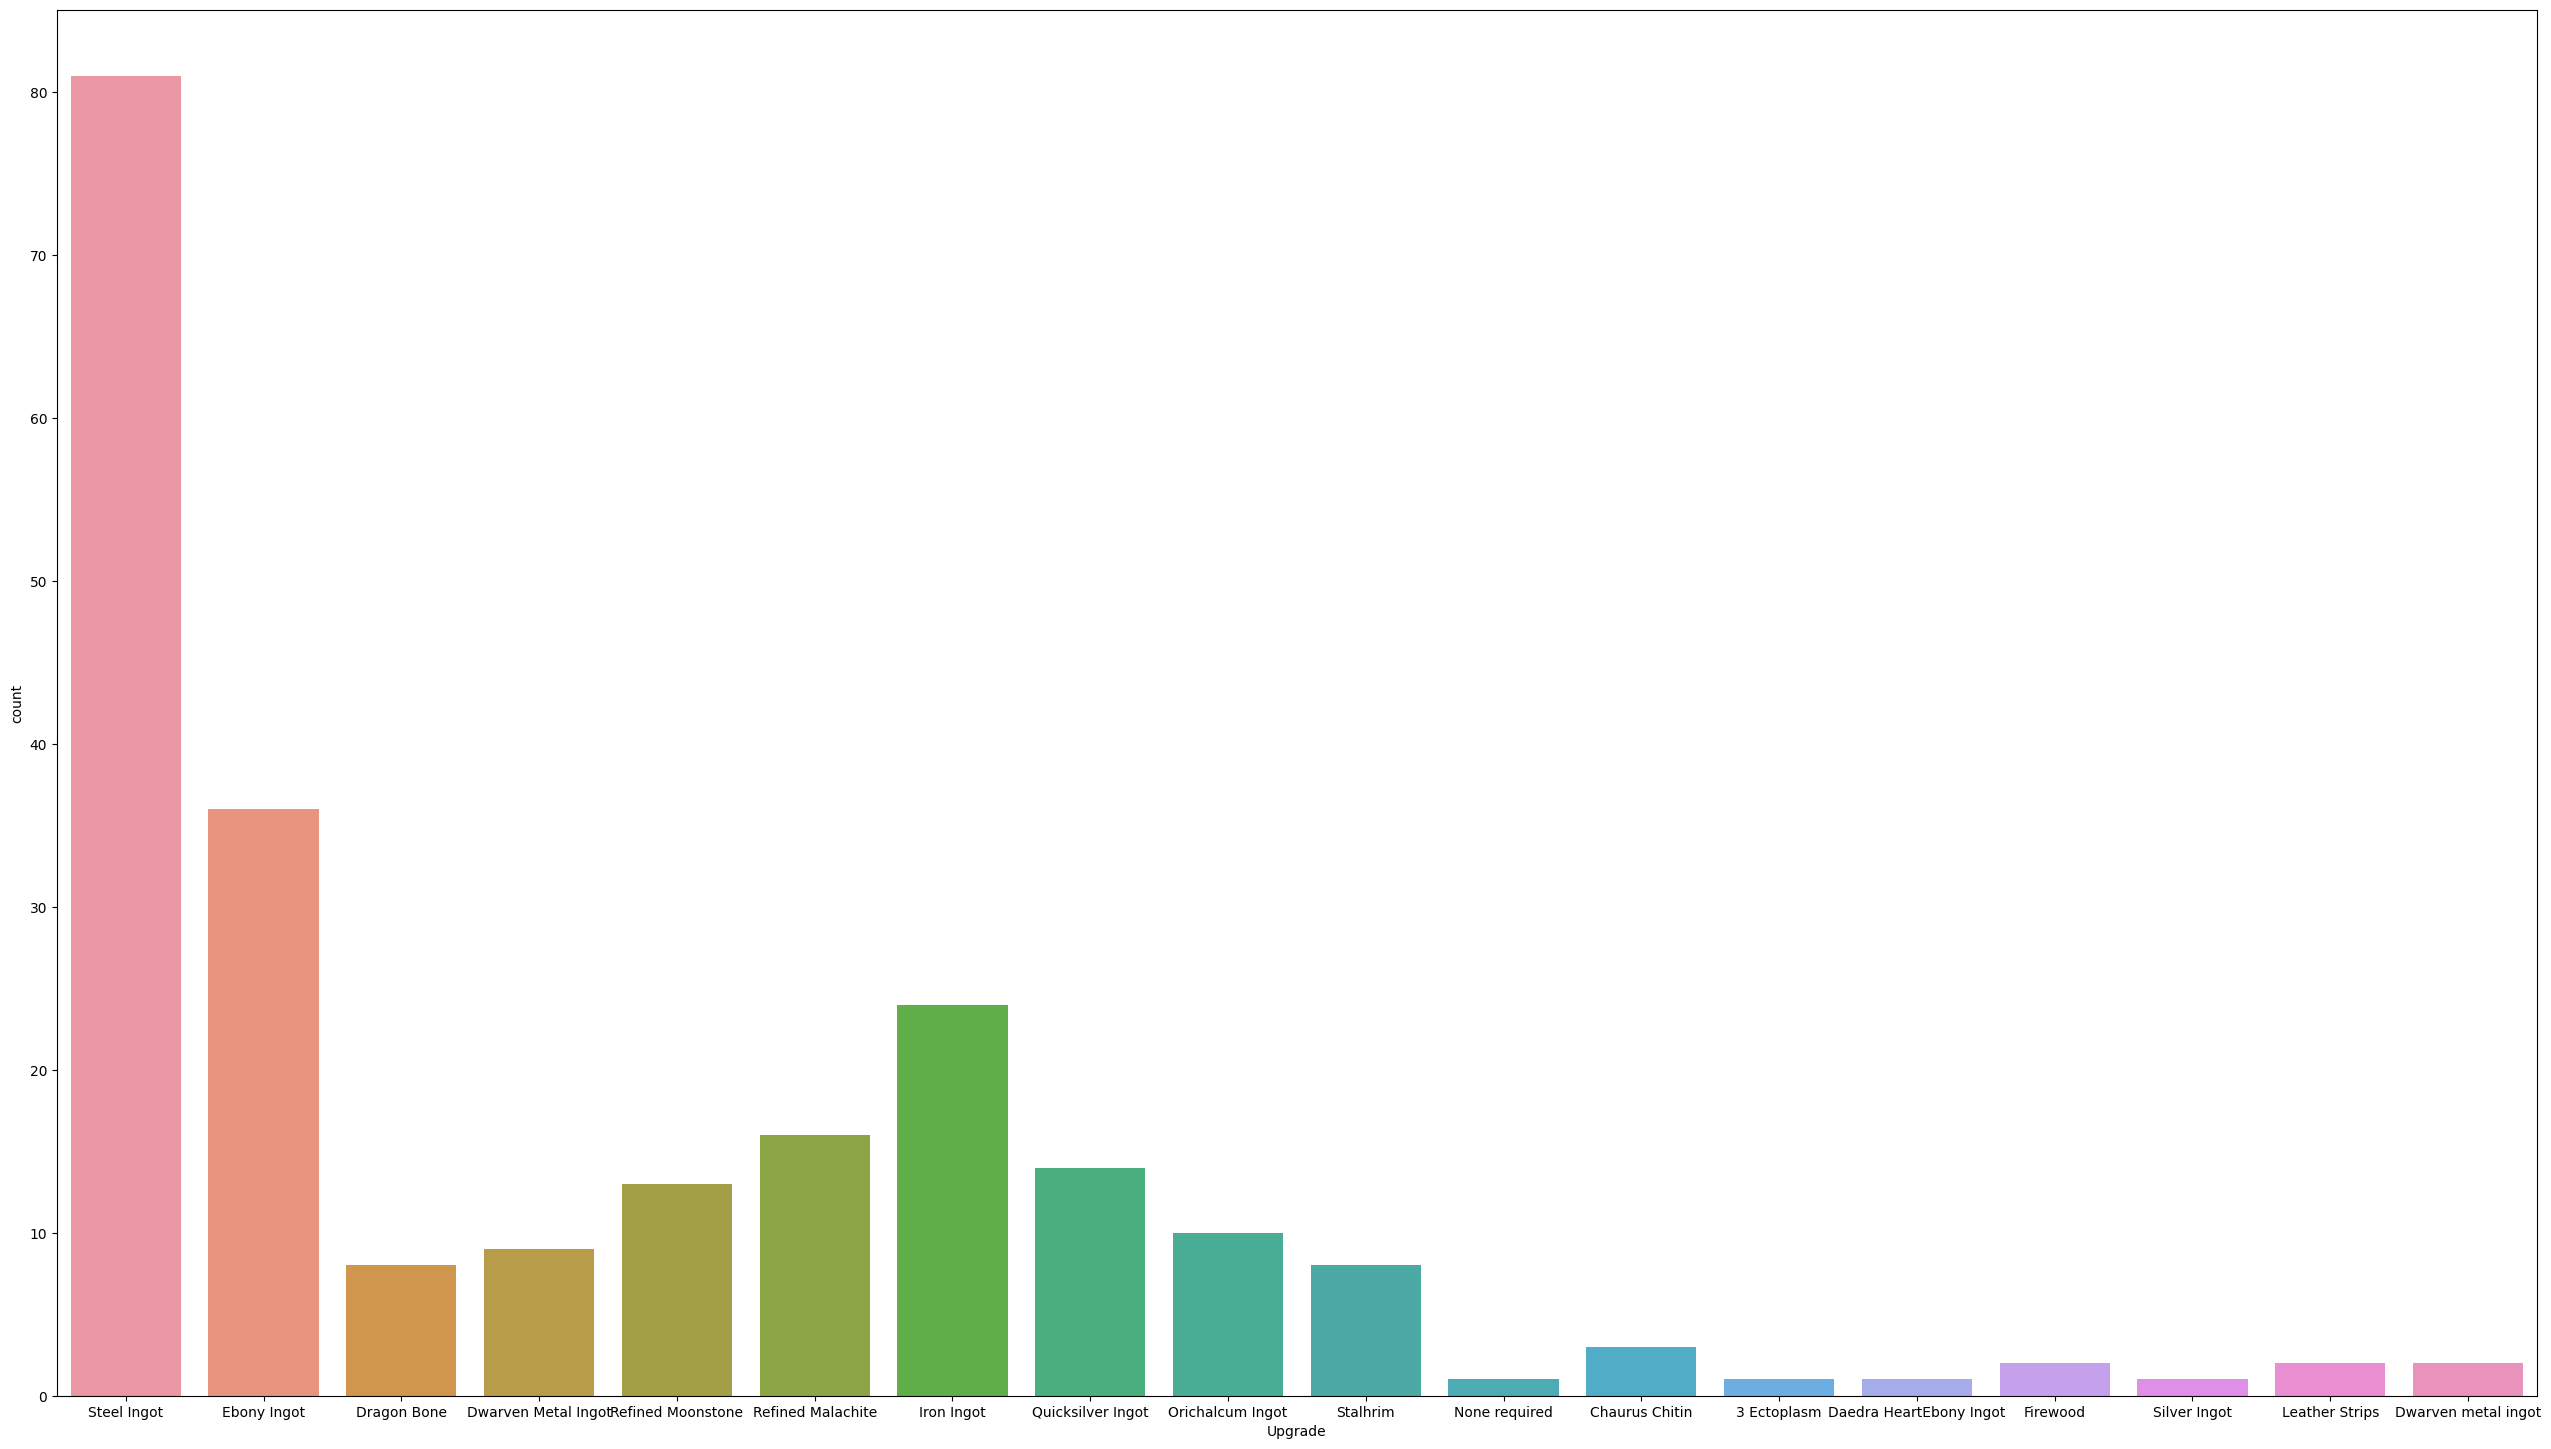

In [15]:
plt.rcParams['figure.figsize'] = 32,18
sns.countplot(x='Upgrade', data=SkyrimWeaponsData)

most of the weapons can be upgraded with steel, ebony and iron ingots

<Axes: xlabel='Damage', ylabel='Gold'>

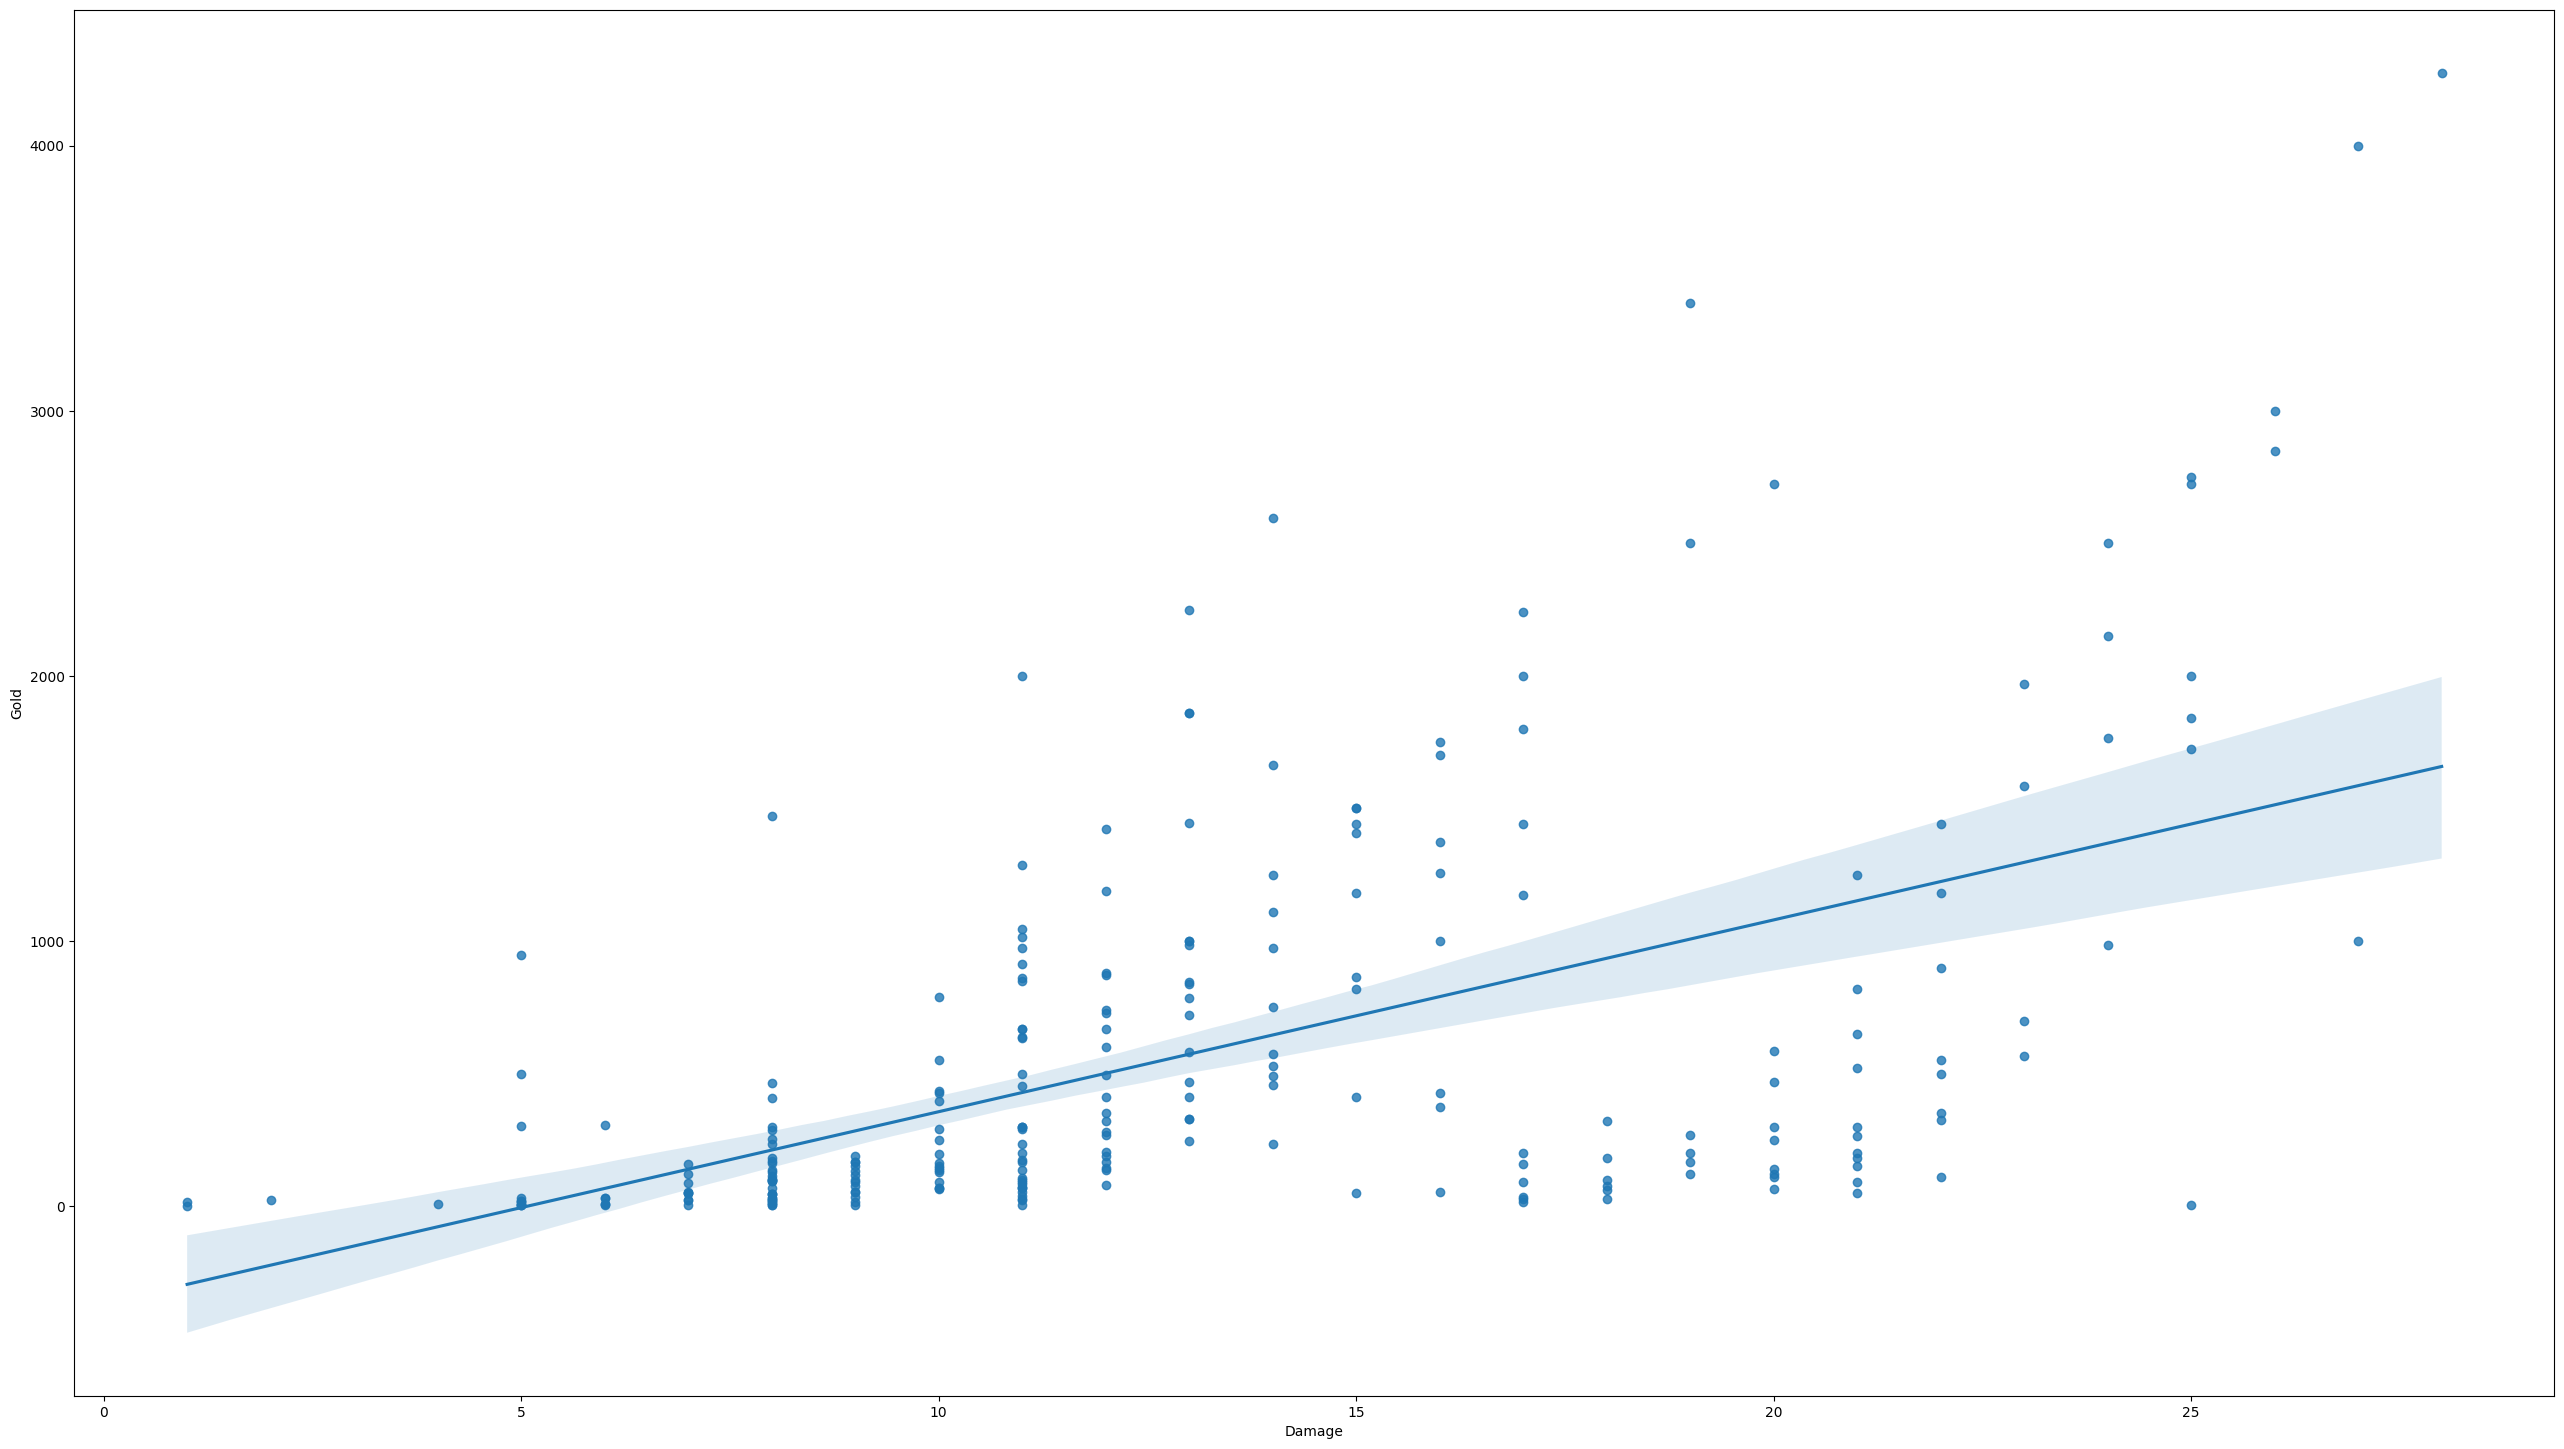

In [16]:
sns.regplot(x=SkyrimWeaponsData['Damage'], y=SkyrimWeaponsData['Gold'])

<Axes: xlabel='Type', ylabel='Gold'>

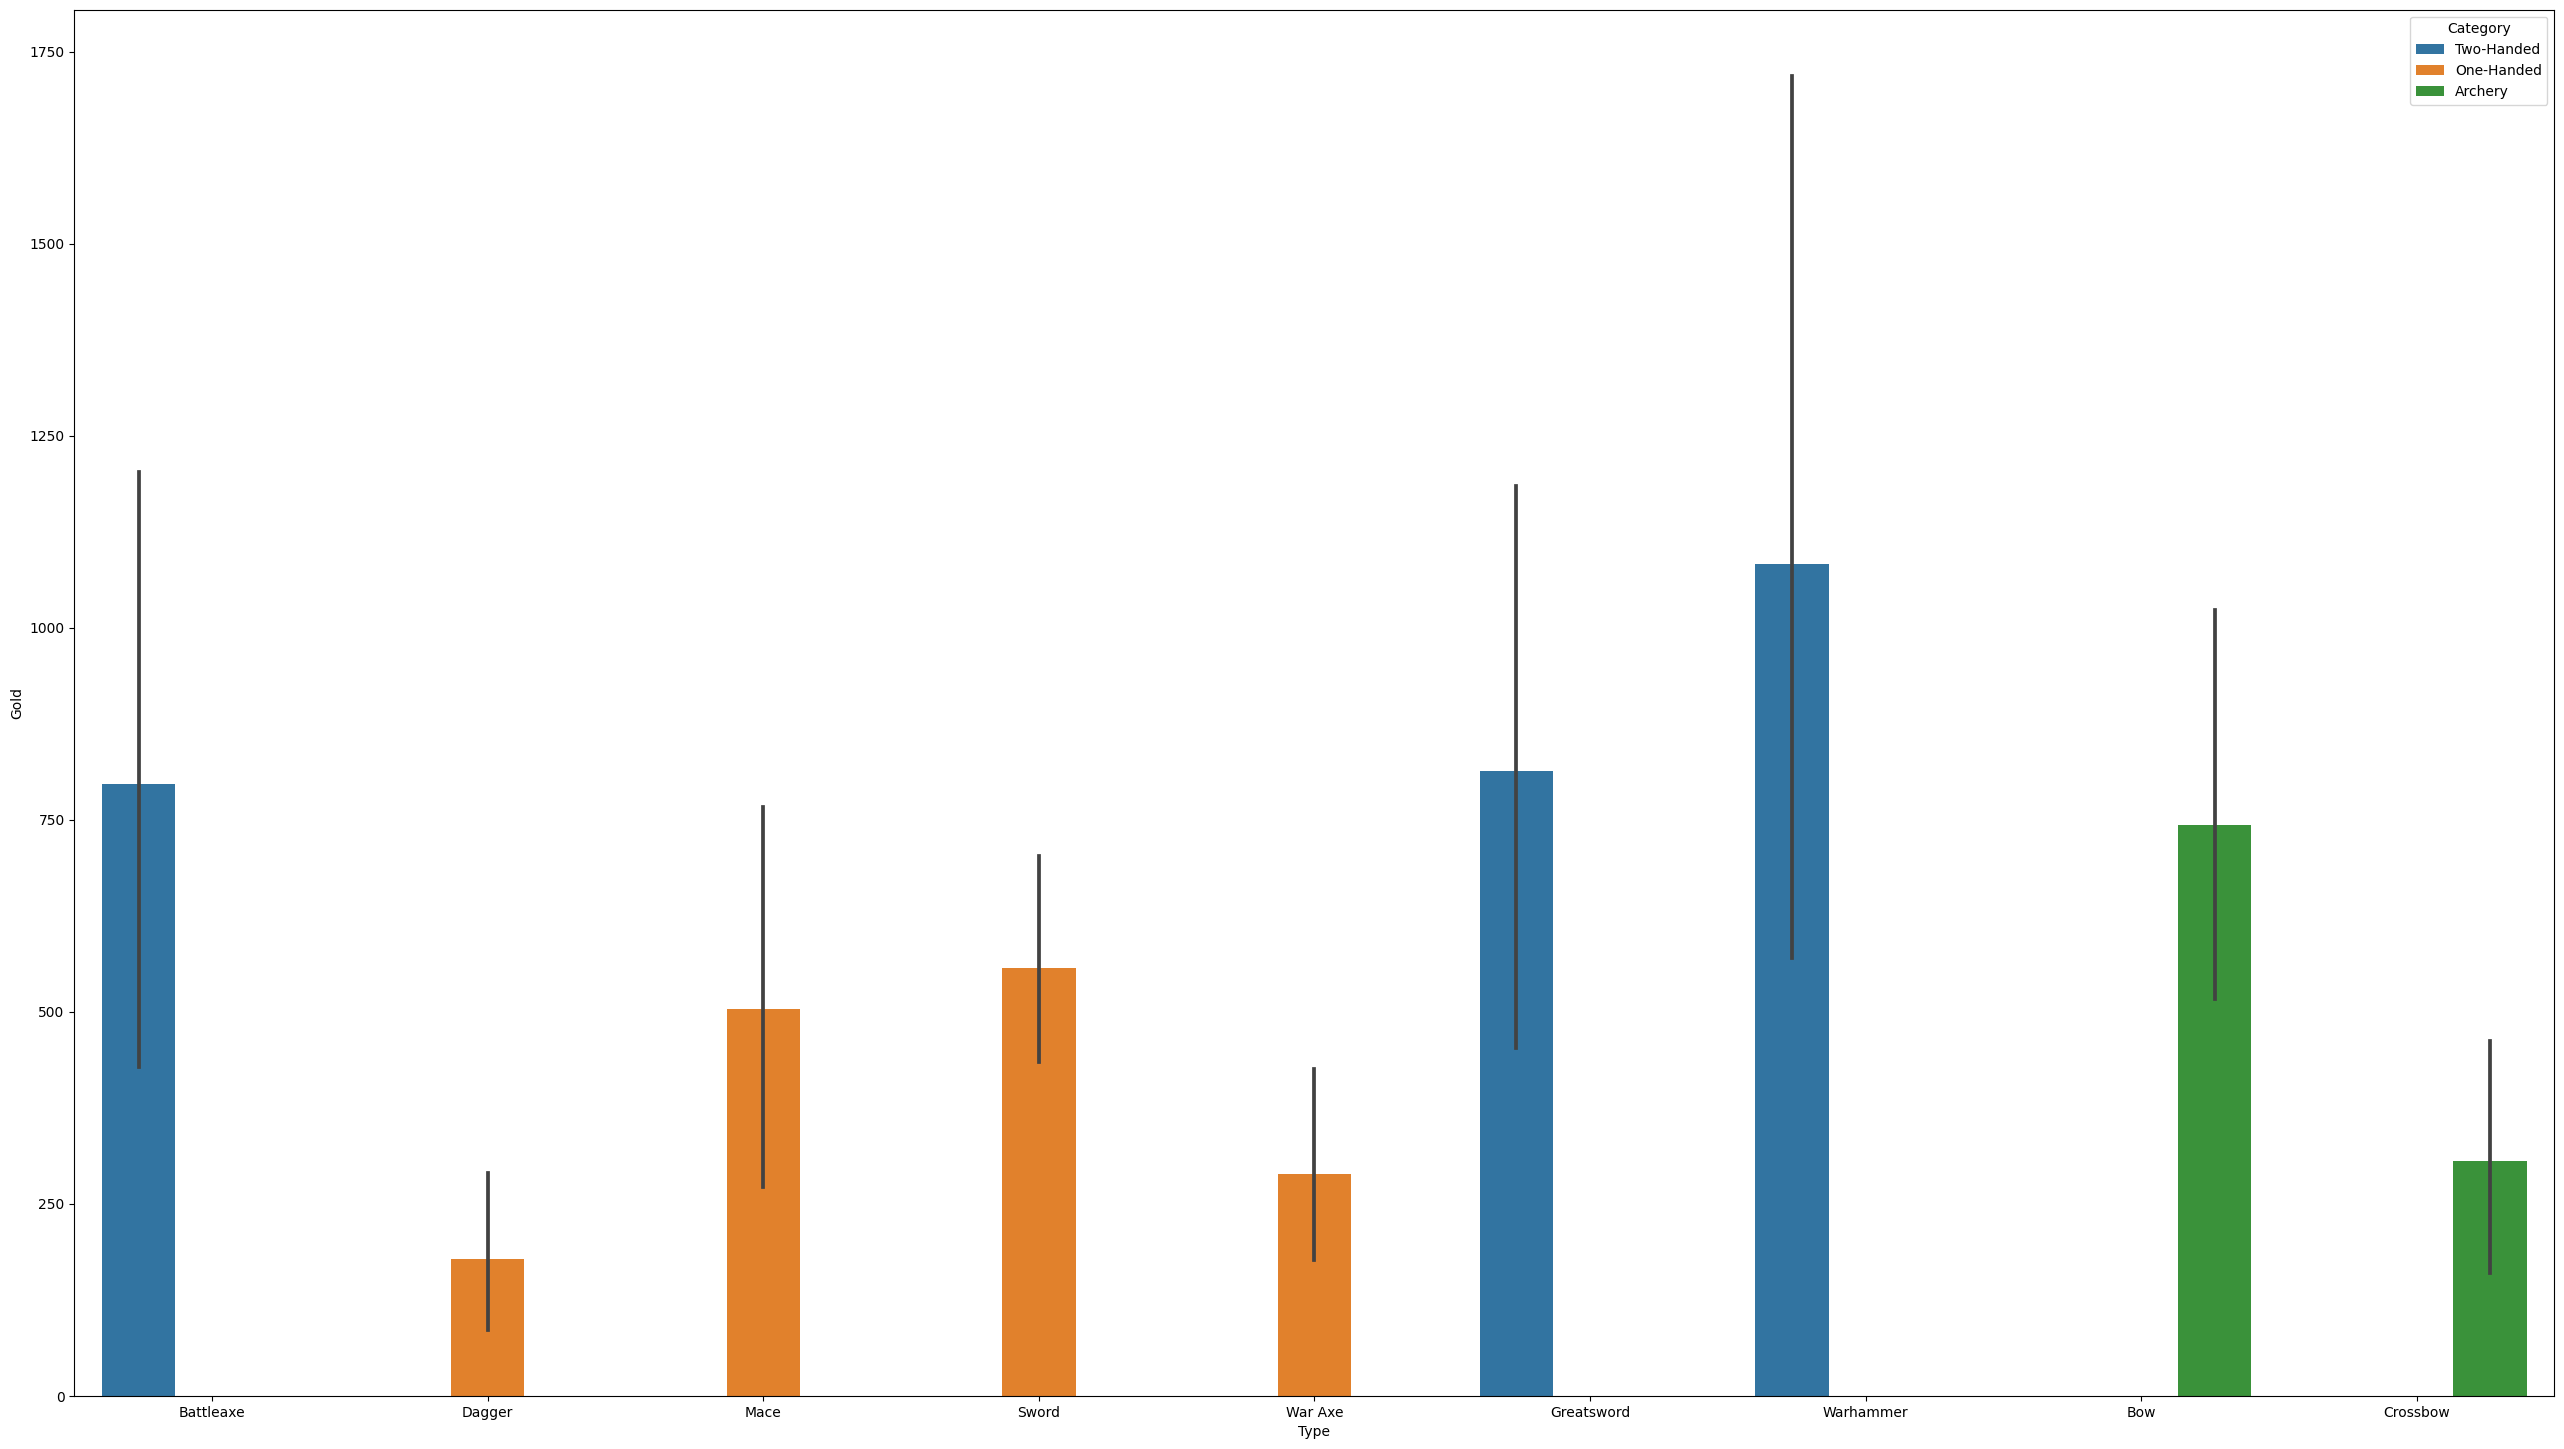

In [17]:
sns.barplot(x=SkyrimWeaponsData['Type'], y=SkyrimWeaponsData['Gold'], hue=SkyrimWeaponsData['Category'])

We can see that weapons that do more dmaage have more weight and sell for more gold

In [18]:
# H0: weight and damage are related

tmp = SkyrimWeaponsData.iloc[:,1:3]
tmp = tmp.loc[tmp['Damage'] != 0]
tmp = tmp.loc[tmp['Weight'] != 0]
tmp

x, p_Value, y,z = scipy.stats.chi2_contingency(tmp)
print('P_Value: ', p_Value)

P_Value:  0.9999854850166191


P_value of 0.99 is > 0.05 so null hypothesis is true and we can conclude that gold and damage are related

In [19]:
SkyrimWeaponsData = pd.read_csv(filePath)
SkyrimAmmoData = SkyrimWeaponsData.loc[(SkyrimWeaponsData['Type'] == 'Arrow') | (SkyrimWeaponsData['Type'] == 'Bolt')]
SkyrimAmmoData

,Name,Damage,Weight,Gold,Upgrade,Perk,Type,Category,Speed
261,Ancient Nord Arrow,10,0.0,1,NaN,NaN,Arrow,Archery,NaN
262,Bloodcursed Elven Arrow DG,16,0.0,6,NaN,NaN,Arrow,Archery,NaN
263,Daedric Arrow,24,0.0,8,NaN,NaN,Arrow,Archery,NaN
264,Dragonbone Arrow DG,25,0.0,9,NaN,NaN,Arrow,Archery,NaN
265,Dwarven Arrow,14,0.0,4,NaN,NaN,Arrow,Archery,NaN
266,Dwarven Sphere Centurion Arrow,20,0.0,0,NaN,NaN,Arrow,Archery,NaN
267,Ebony Arrow,20,0.0,7,NaN,NaN,Arrow,Archery,NaN
268,Elven Arrow,16,0.0,5,NaN,NaN,Arrow,Archery,NaN
269,Falmer Arrow,7,0.0,1,NaN,NaN,Arrow,Archery,NaN
270,Forsworn Arrow,7,0.0,1,NaN,NaN,Arrow,Archery,NaN


In [20]:
SkyrimAmmoData.sort_values('Damage', ascending=False).head()

,Name,Damage,Weight,Gold,Upgrade,Perk,Type,Category,Speed
264,Dragonbone Arrow DG,25,0.0,9,NaN,NaN,Arrow,Archery,NaN
263,Daedric Arrow,24,0.0,8,NaN,NaN,Arrow,Archery,NaN
278,Stalhrim Arrow DR,20,0.0,7,NaN,NaN,Arrow,Archery,NaN
266,Dwarven Sphere Centurion Arrow,20,0.0,0,NaN,NaN,Arrow,Archery,NaN
267,Ebony Arrow,20,0.0,7,NaN,NaN,Arrow,Archery,NaN


We can see arrows are clearly superior to bolts in terms of damage

In [21]:
SkyrimAmmoData.sort_values('Damage', ascending=True).head()

,Name,Damage,Weight,Gold,Upgrade,Perk,Type,Category,Speed
275,Practice Arrow,0,0.0,0,NaN,NaN,Arrow,Archery,NaN
277,Rusty Arrow,4,0.0,0,NaN,NaN,Arrow,Archery,NaN
269,Falmer Arrow,7,0.0,1,NaN,NaN,Arrow,Archery,NaN
270,Forsworn Arrow,7,0.0,1,NaN,NaN,Arrow,Archery,NaN
272,Iron Arrow,8,0.0,1,NaN,NaN,Arrow,Archery,NaN


The lowest performing category is also arrows

<Axes: xlabel='Type', ylabel='Damage'>

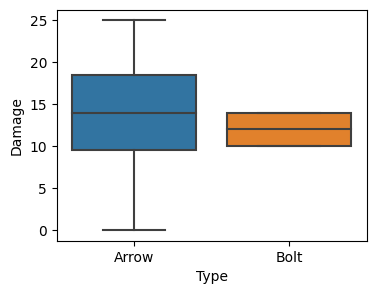

In [22]:
plt.rcParams['figure.figsize'] = 4,3
sns.boxplot(x=SkyrimAmmoData['Type'], y=SkyrimAmmoData['Damage'])

Arrows have a higher mean damage but the standard deviation for arrows is also much greater than bolts

<Axes: xlabel='Type', ylabel='Gold'>

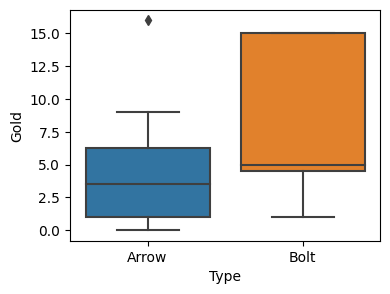

In [23]:
sns.boxplot(x=SkyrimAmmoData['Type'], y=SkyrimAmmoData['Gold'])

Bolts cost much more than arrows and have a much lower base damage

In [24]:
SkyrimSilverwareData = SkyrimWeaponsData.loc[SkyrimWeaponsData['Type'] == 'Silverware']
SkyrimSilverwareData

,Name,Damage,Weight,Gold,Upgrade,Perk,Type,Category,Speed
181,Fork,1,0.5,5,NaN,NaN,Silverware,One-Handed,NaN
182,Knife,2,0.5,1,NaN,NaN,Silverware,One-Handed,NaN


Skyrim silverware is classified as one handed, and they also have weight and damage values. 

**Conclusions**:

    One handed weapons have the lowest base damage, followed by bows and Two handed weapons
    Warhammers had the highest base attack while Daggers had the lowest base attack
    Bows had an outlier 'Karliah's Bow' which had a base damage of 25 which is 3 lesser than the Dragonbone warhammer
    Two handed weapons costed more, weighed more and had higher base damage compared to bows and one handed weapons
    Most of the weapons can be upgraded by Steel ingots and Ebony ingots
    Weapons dealing more damage had much higher cost compared to weapons dealing lower damage
    Warhammers cost the most gold while Daggers cost the least
    The Chi Sq Test for Independence suggests that Weight and Damage are related
    In ammo types Arrows are the best and worst performing
    Arrows have a higher mean damage than bolts
    Bolts cost much more than arrows
    Silverware is concidered one handed and has terrible damage

|